In [1]:
import tango
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import time
MFA_1_AXEIS= 1
MFA_2_AXEIS= 2
MFA_3_AXEIS= 3
REAPER_MFA_3 = False


## Inicializaçao das variáveis do piezo para converter relativos em absolutos
### Correr so uma vez

In [329]:

polaroide_position = 0
tilt_1_position = 0
tilt_2_position = 0
KDF_position = 0

## Init the Shutter controlled by a Arduino Tango communication

In [3]:
#insert arduino serial port to initialize connection with arduino
Arduino_Shutter = tango.DeviceProxy("voxel/Arduino_Shutter/1")
print(Arduino_Shutter.state())
Arduino_Shutter.set_timeout_millis(10000)


ON


### Importante se o Kernel rebentar não correr esta linha abaixo

In [4]:
ArduinoInfo =   {
                    "Name"      : "AS1",
                    "COM"       : 4
                }
ArduinoInfo = json.dumps(ArduinoInfo)
Arduino_Shutter.Connect(ArduinoInfo)

'Device is connected'

## Init the Newport AG_UC8 Tango communication

In [309]:
#insert arduino serial port to initialize connection with AG_UC8 
import tango
import json
N_AG_UC8 = tango.DeviceProxy("voxel/ag_uc8/1")
N_AG_UC8.set_timeout_millis(120000)
print(N_AG_UC8.state())



ON


### Importante se o Kernel rebentar não correr esta linha abaixo

In [310]:
AG_UC8 = {
            "Name"      : "Controller_1",
            "COM"       : 6,   
         }

AG_UC8 = json.dumps(AG_UC8)
print(N_AG_UC8.Connect(AG_UC8))

ola


In [193]:
userinfoS =   {
                            "Name"      : "Controller_1",
                            "Channel"   : 1,
                            "Axis"      : 1 
                        }

userinfoS = json.dumps(userinfoS)
N_AG_UC8.StatusMotor(userinfoS) == "ready"

True

#### Test the Chanels 2 - neste momento o espelho tip tilt da Agilis

In [8]:
# tilt_1_max_movimento_0_t0 = 6*2000
# tilt_2_max_movimento_0_t0 = 7*2000
# tilt_info = {
            #  "Name"      : "Controller_1",
            #  "Channel"   : 2,
            #  "Axis"      : 2,
            #  "Position"  :  0
#         }

# # tilt_info["Axis"] = 1
# # tilt_info["Position"] = 3*2000
# # til_sting = json.dumps(tilt_info)
# # N_AG_UC8.MoveRel(til_sting)
# # time.sleep(1)
    
# tilt_info["Axis"] = 2
# tilt_info["Position"] = int(500)
# til_sting = json.dumps(tilt_info)
# N_AG_UC8.MoveRel(til_sting)

IndentationError: unexpected indent (1234094308.py, line 4)

In [295]:
# userinfoS_3 =   {
#                             "Name"      : "Controller_1",
#                             "Channel"   : 3,
#                             "Axis"      : 1 
#                         }








# # N_AG_UC8.StatusMotor(userinfoS_3) == "ready"
# userinfoS_3["Position"] = int(-10)
# string_3 = json.dumps(userinfoS_3)
# N_AG_UC8.MoveRel(string_3)

' The motor is starting moving'

## Init the SMC100 Tango communication
### Neste momento ligados aos eixos Newport MFA 1 2 e 3 (o 3 esta estragado)

In [29]:
#insert motors' serial port to initialize connection with motors
SMC100 = tango.DeviceProxy("voxel/SMC100/1")
print(SMC100.state())
SMC100.set_timeout_millis(120000)

ON


### Importante se o Kernel rebentar não correr esta linha abaixo

In [30]:
userInfoController =  {
                            "Name"                  : "SC1",
                            "COM"                   : 5,
                            "Number_of_controllers" : 3
                        }
userInfoController=json.dumps(userInfoController)
SMC100.ConnectCamera(userInfoController)

'Controller has been connected successfully COM5'

### Comando para fazer HOME ao motor MFA

In [33]:
userInfoH = {
                        "Name"              : "SC1",
                        "Axis"              : 3,
                        "Wait_to_finish"    : True
                     }
userInfoP_String = json.dumps(userInfoH)
current_position_z = SMC100.Home(userInfoP_String)
print("Position MFA 3:"+str(current_position_z))

Position MFA 3:Motor was moved to the Home.


## Init the Thorlabs Camera Tango communication

In [11]:
ThorlabsCamera =  tango.DeviceProxy("camera/thorlabs/zelux44")
print("state: "+str(ThorlabsCamera.state()))
ThorlabsCamera.set_timeout_millis(9000)

state: RUNNING


### Need to change parameters of the camera using this function

In [12]:
ThorlabsCamera.get_attribute_list()

['ExposureTime', 'Gain', 'FramesTrigger', 'ROI', 'Image', 'State', 'Status']

In [274]:
ThorlabsCamera.ExposureTime = 5000


### Se o state da ThorlabsCamera estiver RUNNING não correr o StartAcqusition

In [14]:
ThorlabsCamera.StartAcqusition()

''

In [21]:
ThorlabsCamera.StopAcqusition()

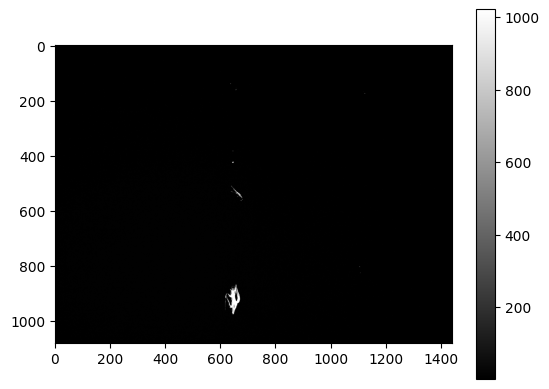

In [15]:
#ThorlabsCamera.Snap()
plt.imshow(ThorlabsCamera.Image,cmap="grey")
plt.colorbar()

# Standa Motor

In [16]:
Standa = tango.DeviceProxy("voxel/StandaM/1")
print(Standa.state())
Standa.set_timeout_millis(120000)

ON


In [17]:
Standa.get_command_list()

['Init', 'State', 'Status', 'connection', 'get_list_diveces', 'get_position', 'move_calibrat', 'move_to', 'relative_shift', 'set_device', 'set_device_as_virtual', 'set_user_unit', 'set_zero']

Atençao, neste momento: aqui estao os motores device  1742628097 (esta usado na experiencia de optimizacao no COM 8) e o 32 ligado a translacionadores do Pablo no COM3
O Pedro vai eventualmente standardizar os nomes dos motores

In [18]:
Standa.get_list_diveces()

"Dice found: {'uri': 'xi-com:\\\\\\\\.\\\\COM10', 'device_serial': 4128860, 'Manufacturer': '', 'ManufacturerId': '', 'ProductDescription': '', 'Major': 0, 'Minor': 0, 'Release': 0, 'ControllerName': '', 'CtrlFlags': 0, 'PositionerName': ''}\t{'uri': 'xi-com:\\\\\\\\.\\\\COM9', 'device_serial': 6029375, 'Manufacturer': '', 'ManufacturerId': '', 'ProductDescription': '', 'Major': 0, 'Minor': 0, 'Release': 0, 'ControllerName': '', 'CtrlFlags': 0, 'PositionerName': ''}\t{'uri': 'xi-com:\\\\\\\\.\\\\COM8', 'device_serial': 3801155, 'Manufacturer': '', 'ManufacturerId': '', 'ProductDescription': '', 'Major': 0, 'Minor': 0, 'Release': 0, 'ControllerName': '', 'CtrlFlags': 0, 'PositionerName': ''}\t{'uri': 'xi-com:\\\\\\\\.\\\\COM3', 'device_serial': 5570652, 'Manufacturer': '', 'ManufacturerId': '', 'ProductDescription': '', 'Major': 0, 'Minor': 0, 'Release': 0, 'ControllerName': '', 'CtrlFlags': 0, 'PositionerName': ''}\t"

### Importante se o Kernel rebentar não correr esta linha abaixo

In [19]:
Standa.set_device('8')

'it was selected the device 8'

### Importante se o Kernel rebentar não correr esta linha abaixo

In [20]:
Standa.connection("open")

'Connection established'

In [30]:
Standa_Vac_1 = tango.DeviceProxy("motor/standa/vacaxis1")
print(Standa_Vac_1.state())
Standa_Vac_1.set_timeout_millis(100000)

ON


### Importante se o Kernel rebentar não correr esta linha abaixo

In [31]:
Standa_Vac_1.set_device('9')

'it was selected the device 9'

### Importante se o Kernel rebentar não correr esta linha abaixo

In [32]:
Standa_Vac_1.connection("open")

'Connection established'

In [33]:
Standa_Vac_2 = tango.DeviceProxy("motor/standa/vacaxis2")
print(Standa_Vac_2.state())
Standa_Vac_2.set_timeout_millis(120000)

ON


### Importante se o Kernel rebentar não correr esta linha abaixo

In [34]:
Standa_Vac_2.set_device('10')

'it was selected the device 10'

### Importante se o Kernel rebentar não correr esta linha abaixo

In [35]:
Standa_Vac_2.connection("open")

'Connection established'

### Function that recives the Coord and send it to te Controller via Tango

In [34]:
import json
userInfoP = {
                "Name" : "SC1",
                "Axis" : MFA_1_AXEIS
            }
def MoveToPosition(coords):
    userInfoP["Axis"] = MFA_1_AXEIS
    # print(userInfoP)
    userInfoP_String = json.dumps(userInfoP)
    current_position_x = SMC100.GetPosition(userInfoP_String)
    # print("Position MFA 1:"+str(current_position_x))
    userInfoP["Axis"] = MFA_2_AXEIS
    userInfoP_String = json.dumps(userInfoP)
    current_position_y = SMC100.GetPosition(userInfoP_String)
    # print("Position MFA 2:"+str(current_position_y))
    userInfoP["Axis"] = MFA_3_AXEIS
    userInfoP_String = json.dumps(userInfoP)
    current_position_z = SMC100.GetPosition(userInfoP_String)
    # print("Position MFA 3:"+str(current_position_z))

    # print(current_position_x)
    # print(current_position_y)

    userInfoMA =    {
                        "Name"              : "SC1",
                        "Axis"              : MFA_1_AXEIS,
                        "Position"          : 5,
                        "Wait_to_finish"    : True
                    }
    # print(len(coords))
    if len(coords) == 3:

        if coords[0] != current_position_x:
            userInfoMA["Axis"] = MFA_1_AXEIS
            userInfoMA["Position"] = coords[0]
            userInfoMA_string = json.dumps(userInfoMA)
            SMC100.MoveAbsolute_mm(userInfoMA_string)

        if coords[1] != current_position_y:
            
            userInfoMA["Axis"] = MFA_2_AXEIS
            userInfoMA["Position"] = coords[1]
            userInfoMA_string = json.dumps(userInfoMA)
            SMC100.MoveAbsolute_mm(userInfoMA_string)
        
        if coords[2] != current_position_z  :
            if REAPER_MFA_3:
                userInfoMA["Axis"] = MFA_3_AXEIS
                userInfoMA["Position"] = coords[2]
                userInfoMA_string = json.dumps(userInfoMA)
                SMC100.MoveAbsolute_mm(userInfoMA_string)
            else:
                print("The moto MFA 3 is damaged!! Pls do not use it, or check with someone ")

    else:
        print("Error: Wrong input. Please insert a position to which you want to move as x, y, z",
            "(e.g. the input of 1.2, 3.3 will move the motors to a position where x=1.2 mm and y=3.3 mm)")

Simple test of the movement of the motors 

In [35]:
#run to make a move to a desired position

a = input("insert a desired position [mm] as a pair x, y, z: ") 
coords = list(float(x) for x in a.split(","))
MoveToPosition(coords)



In [39]:
# userInfoMA =    {
#                     "Name"              : "SC1",
#                     "Axis"              : MFA_2_AXEIS,
#                     "Position"          : 5,
#                     "Wait_to_finish"    : True
#                 }
# userInfoMA["Axis"] = MFA_2_AXEIS
# userInfoMA["Position"] = 1
# userInfoMA_string = json.dumps(userInfoMA)
# SMC100.MoveAbsolute_mm(userInfoMA_string)

Read the current motor positions

In [22]:
# # this is the broken motor!
# #if youwant to use MoveToPosition, be sure to introduce this coordinate

userInfoP["Axis"] = MFA_3_AXEIS
userInfoP_String = json.dumps(userInfoP)
current_position_z = SMC100.GetPosition(userInfoP_String)
print("Position MFA 3:"+str(current_position_z))

Position MFA 3:-0.0


In [23]:
# # This motor is currently horizontal movement transverse to optical axis

userInfoP["Axis"] = MFA_2_AXEIS
userInfoP_String = json.dumps(userInfoP)
current_position_x = SMC100.GetPosition(userInfoP_String)
print("Position MFA 2:"+str(current_position_x))

Position MFA 2:-0.0


In [25]:
# # This motor is currently set to mov along the optical axis
userInfoP["Axis"] = MFA_1_AXEIS
userInfoP_String = json.dumps(userInfoP)
current_position_y = SMC100.GetPosition(userInfoP_String)
print("Position MFA 1:"+str(current_position_y))

Position MFA 1:-0.0


# The experiment code 

In [267]:
polaroide_info = {
            "Name"      : "Controller_1",
            "Channel"   : 1,
            "Axis"      : 1,
            "Position"  : 0
        }
tilt_info = {
            "Name"      : "Controller_1",
            "Channel"   : 2,
            "Axis"      : 2,
            "Position"  :  0
        }
Device_to_Open =    {
                        "Name"      : "AS1"
                    }

userinfoS_pol =   {
                            "Name"      : "Controller_1",
                            "Channel"   : 1,
                            "Axis"      : 1 
                        }
userinfoS_til1 =   {
                            "Name"      : "Controller_1",
                            "Channel"   : 2,
                            "Axis"      : 1 
                        }
userinfoS_til2 =   {
                            "Name"      : "Controller_1",
                            "Channel"   : 2,
                            "Axis"      : 2 
                        }

KDF =   {
                            "Name"      : "Controller_1",
                            "Channel"   : 3,
                            "Axis"      : 1 
                        }

userinfoS_pol = json.dumps(userinfoS_pol)
userinfoS_til1 = json.dumps(userinfoS_til1)
userinfoS_til2 = json.dumps(userinfoS_til2)
userinfoKDF_info= json.dumps(KDF)

Device_to_Open_string = json.dumps(Device_to_Open)



def function_experiment(polaroide,open_Iris,tilt_1,tilt_2,KDF_3,move_MFA_1,move_MFA_2,move_MFA_3,area=[[120,800],[350,1100]]):
    # Move the Polaroide piezo motor
    global polaroide_position
    global tilt_1_position
    global tilt_2_position
    global KDF_position

    time_waiting = 1
    
    polaroide_delta = polaroide - polaroide_position 
    tilt_1_delta  =  tilt_1 - tilt_1_position  
    tilt_2_delta  = tilt_2 - tilt_2_position 
    KDF_delta  = KDF_3 - KDF_position 
    
    polaroide_position = polaroide
    tilt_1_position  = tilt_1
    tilt_2_position  = tilt_2  
    KDF_position = KDF_3

    print(str(polaroide)+" "+str(open_Iris)+" "+str(tilt_1)+" "+str(tilt_2)+" "+str(KDF_3)+" "+str(move_MFA_1)+" "+str(move_MFA_2)+" "+str(move_MFA_3))

    if polaroide_delta != 0:
        polaroide_info["Position"]=polaroide_delta
        polaroide_string = json.dumps(polaroide_info)
        N_AG_UC8.MoveRel(polaroide_string)
        time.sleep(time_waiting)
        polaroide_MOVING = (N_AG_UC8.StatusMotor(userinfoS_pol) != "ready")
        # print(N_AG_UC8.StatusMotor(userinfoS_pol))
        # print(polaroide_MOVING)
    else:
        polaroide_MOVING = False



    # This divece wait of the stop comand
    Standa.move_to(open_Iris)
    
    if tilt_1_delta != 0:
        print(tilt_1_delta)
        tilt_info["Axis"] = 1
        tilt_info["Position"] = tilt_1_delta
        til_sting = json.dumps(tilt_info)
        time.sleep(time_waiting)
        N_AG_UC8.MoveRel(til_sting)
        time.sleep(time_waiting)
        tilt_info_m_1 = N_AG_UC8.StatusMotor(userinfoS_til1) != "ready"
    else:
        tilt_info_m_1 = False
        
    if tilt_2_delta != 0:
        tilt_info["Axis"] = 2
        tilt_info["Position"] = tilt_2_delta
        til_sting = json.dumps(tilt_info)
        time.sleep(time_waiting)
        N_AG_UC8.MoveRel(til_sting)
        time.sleep(time_waiting)
        tilt_info_m_2 = N_AG_UC8.StatusMotor(userinfoS_til2) != "ready"
    else:   
        tilt_info_m_2 = False
        
    if tilt_1_delta != 0 or tilt_2_delta != 0:
        
        time.sleep(time_waiting)
        tilt_info_m_1 = N_AG_UC8.StatusMotor(userinfoS_til1) != "ready"
        time.sleep(time_waiting)
        tilt_info_m_2 = N_AG_UC8.StatusMotor(userinfoS_til2) != "ready"
        time.sleep(time_waiting)
        tilt_MOVING = (tilt_info_m_1) or (tilt_info_m_2)
    else:
        tilt_MOVING = False

    while polaroide_MOVING:
        if polaroide_MOVING:
            polaroide_MOVING = (N_AG_UC8.StatusMotor(userinfoS_pol) != "ready")
        time.sleep(time_waiting)
        
    if KDF_delta != 0:
        KDF["Position"] = KDF_delta
        til_sting = json.dumps(KDF)
        N_AG_UC8.MoveRel(til_sting)
        time.sleep(time_waiting)
        KDF_info_m = N_AG_UC8.StatusMotor(userinfoKDF_info) != "ready"
    else:
        KDF_info_m = False
        
    # print(N_AG_UC8.StatusMotor(userinfoS_til1))
    
    # print(N_AG_UC8.StatusMotor(userinfoS_til2))
    # print(tilt_MOVING)
    

    MoveToPosition([move_MFA_1,move_MFA_2,move_MFA_3])

    while polaroide_MOVING or tilt_MOVING or KDF_info_m:
        if polaroide_MOVING:
            polaroide_MOVING = (N_AG_UC8.StatusMotor(userinfoS_pol) != "ready")
            time.sleep(time_waiting)
        if tilt_info_m_1: 
            tilt_info_m_1 = N_AG_UC8.StatusMotor(userinfoS_til1) != "ready"
            time.sleep(time_waiting)
        if tilt_info_m_2:
            tilt_info_m_2 = N_AG_UC8.StatusMotor(userinfoS_til2) != "ready"
            time.sleep(time_waiting)
        if KDF_info_m:
            KDF_info_m = N_AG_UC8.StatusMotor(userinfoKDF_info) != "ready"
        tilt_MOVING = (tilt_info_m_1) or (tilt_info_m_2)
        time.sleep(time_waiting)

    Arduino_Shutter.OpenShutter(Device_to_Open_string)
    ThorlabsCamera.Snap()
    Arduino_Shutter.CloseShutter(Device_to_Open_string)
    Image_to_evalute = ThorlabsCamera.Image
    # plt.imshow(Image_to_evalute,cmap="grey")
    # plt.colorbar()
    # plt.show()

    area_of_study = Image_to_evalute[area[0][0]:area[0][1],area[1][0]:area[1][1]]
    val = -1* np.mean(area_of_study)

    polaroide_position = polaroide
    tilt_1_position  = tilt_1
    tilt_2_position  = tilt_2  
    KDF_position = KDF_3

    return val, Image_to_evalute, area_of_study
    


In [20]:
Standa.move_to(150)

'Stop moving at 150'

In [49]:
Standa_Vac_2.get_position()

'Position: 83000\nuPosition: 0\nEncPosition: 83000\n'

In [50]:
Standa_Vac_2.move_to(88000)

'Stop moving at 88001'

# Conjunto de movimentos para a optimização

In [357]:
polaroide = 20000
open_Iris = 368 
tilt_1 = 0
tilt_2 = 0
KDF_p = 0
move_MFA_1 = 8
move_MFA_2 = 3
move_MFA_3 = 0 # motor not avaible is going to be repear
area=[[600,800],\
      [750,1100]]
mean,full_image,area_of_study = function_experiment(polaroide,open_Iris,tilt_1,tilt_2,KDF_p,move_MFA_1,move_MFA_2,move_MFA_3,area)

20000 368 0 0 0 8 3 0


Mean :-48.34247142857143


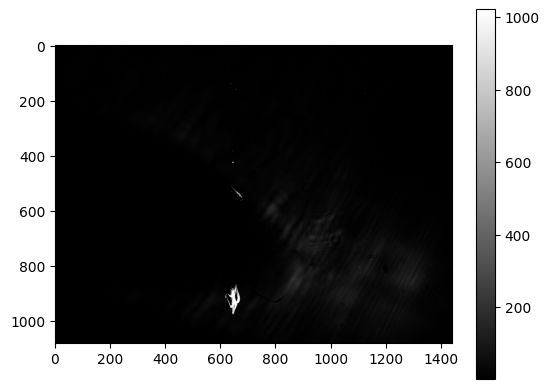

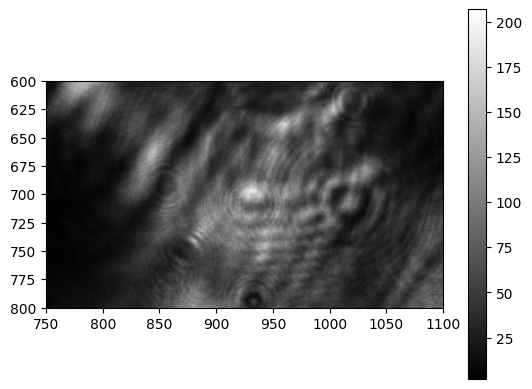

368


In [358]:
print("Mean :"+str(mean))
plt.imshow(full_image,cmap="grey")
plt.colorbar()
plt.show()
plt.imshow(area_of_study,cmap="grey",extent=[area[1][0],area[1][1],area[0][1],area[0][0]])
# plt.set_xlabel([80,122]) # range of values in edges
plt.colorbar()
plt.show()
print(open_Iris)

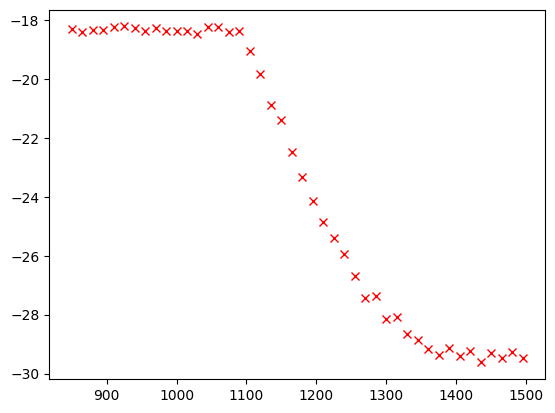

In [15]:
# %matplotlib inline
# import time
# import pylab as pl
# from IPython import display
# x=0
# mean_array = []
# full_image_array=[]
# area_of_study_array = []
# for i in range(850,1500,15):
#     mean,full_image,area_of_study = function_experiment(polaroide,i,6000,6000,move_MFA_1,move_MFA_2,move_MFA_3,area)
#     pl.plot(i,mean,"xr")
#     mean_array.append(mean)
#     full_image_array.append(full_image)
#     area_of_study_array.append(area_of_study)
#     x=x+1
#     display.clear_output(wait=True)
#     display.display(pl.gcf())

# display.clear_output(wait=True)

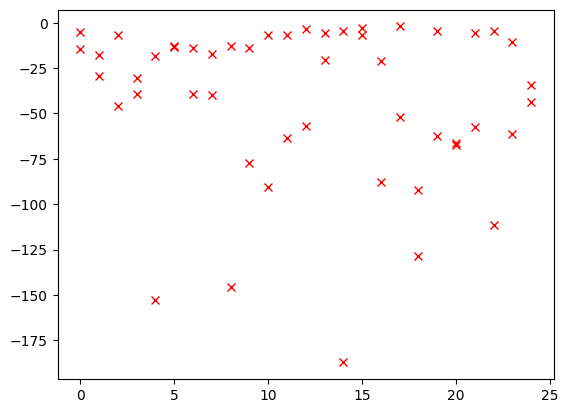

24	-43.50687142857143	16996.399027996646	859.6809910181648	8.090216603848845	3.5462362205069358	

    2     50 -1.872016571428571e+02 1.5e+00 5.65e+04  6e-02  1e+04 21:02.5
[array([1.04580174e+04, 5.84223626e+02, 8.05427823e+00, 1.05955084e+00]), array([5.06352238e+03, 2.04450519e+02, 8.05493969e+00, 1.00885640e+00]), array([3.42689397e+04, 2.93839563e+02, 8.05832906e+00, 4.76592238e+00]), array([6.27714071e+03, 3.00796073e+02, 8.04388871e+00, 1.01902342e+00]), array([4036.8176114 ,  501.46493313,    8.04440162,    5.19812689]), array([2.23493769e+04, 7.64713265e+02, 8.01637101e+00, 3.64568361e+00]), array([7.49032374e+03, 3.26500605e+02, 7.96130000e+00, 2.14562959e+00]), array([1.09180061e+04, 6.31730470e+02, 8.09972852e+00, 2.78764397e+00]), array([6.58792237e+03, 2.87751398e+02, 7.99111061e+00, 5.99624491e+00]), array([4.29944755e+03, 5.22879321e+02, 8.00676734e+00, 2.66952214e+00]), array([2017.71910376,  211.83429603,    7.97490497,    2.30246333]), array([2.01190826e+04, 5.322650

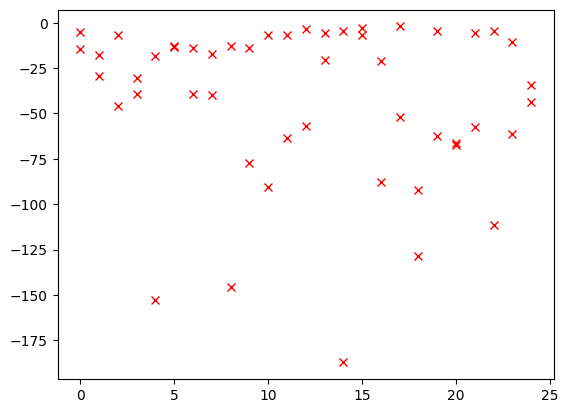

In [348]:
import cma
import pickle
%matplotlib inline
import time
import pylab as pl
from IPython import display
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
x_plot=0
image_save = []
'''
arg 
Mude este comentario a medida que sejam feitas mudanças
sao:
0 - polaroide
1 - open_Iris
tilt_1
tilt_2
KDF_p
move_MFA_1
move_MFA_2
move_MFA_3
'''

def fitness(arg):
    # print(arg)
    polaroide = int(arg[0])
    open_Iris = int(arg[1])
    tilt_1 = 0#int(arg[2])
    tilt_2 = 0#int(arg[3])
    KDF_p = 0#int(arg[2])
    move_MFA_1 = round(arg[2],2)
    move_MFA_2 = round(arg[3],2)
    move_MFA_3 = 0
    area=[[600,800],\
      [750,1100]]
    mean,full_image,area_of_study = function_experiment(polaroide,open_Iris,tilt_1,tilt_2,KDF_p,move_MFA_1,move_MFA_2,move_MFA_3,area)
    image_save.append(area_of_study)
    return mean

bay_opt_name = 'filename'
opts = cma.CMAOptions()
# opts.set("bounds", [[20000,200,-500,0,-1500,14.9,1], [50000, 1000 ,0,500,1500,15.1,6]])
opts.set("bounds", [[0,200,7.9,1], [40000, 1000 ,8.1,6]])

# numero de testes de parametro 
opts.set('popsize', 25)
opts.set('ftarget', -170)
es = cma.CMAEvolutionStrategy([10000,250,8,3],50000, opts)
dt_string = now.strftime("%d-%m-%Y_t_%H_%M_%S")
total_data = "Iteracao\tMean\tpolaroide\topen_Iris\tmove_X\tmove_Y\n\r"

while not es.stop():
    X = es.ask()
    f_values = np.zeros(len(X))
    for i in range(len(X)):
        # try:  
        print(X[i])
        f_values[i] = fitness(X[i])
        pl.plot(i,f_values[i],"xr") 
        display.clear_output(wait=True)
        display.display(pl.gcf())
        data = str(i)+"\t"+str(f_values[i])+"\t"
        for key in X[i]:
            data += str(key)+"\t"
        
        data += "\n\r"
        print(data)
        total_data +=data
    es.tell(X, f_values)
    es.disp()
    es.logger.add()
    total_data 
    # f.close()
        
    pickle.dump(es,open("C:\\Users\\Voxel\\Desktop\\HowTo\\Experiment_Example\\out.txt","wb"))
    print(X)

In [349]:

with open("__output_test.txt", "w") as f:
    f.write(total_data)

In [366]:
# importing pandas
import pandas as pd

# read text file into pandas DataFrame
df = pd.read_csv("_output_test.txt", sep="\t")

# display DataFrame
print(df["Iteracao"].values)

[ -14.68848571  -29.26667143   -6.49535714  -30.6055     -152.63077143
  -13.04004286  -13.87737143  -39.89115714 -145.76047143  -14.01655714
   -6.48301429  -63.66427143   -3.46372857  -20.66822857   -4.35165714
   -3.04331429  -21.14468571  -51.8626      -91.98042857   -4.75368571
  -66.3859       -5.7927       -4.37581429  -10.60874286  -34.2075
   -5.32638571  -17.61034286  -46.12268571  -39.52292857  -18.2269
  -13.15087143  -39.52308571  -17.06984286  -12.62258571  -77.11517143
  -90.64074286   -6.49148571  -57.11298571   -5.76874286 -187.20165714
   -6.89461429  -87.57271429   -2.05718571 -128.80517143  -62.49864286
  -67.19237143  -57.42467143 -111.3818      -61.15435714  -43.50687143]


Text(0.5, 0, 'Iteration')

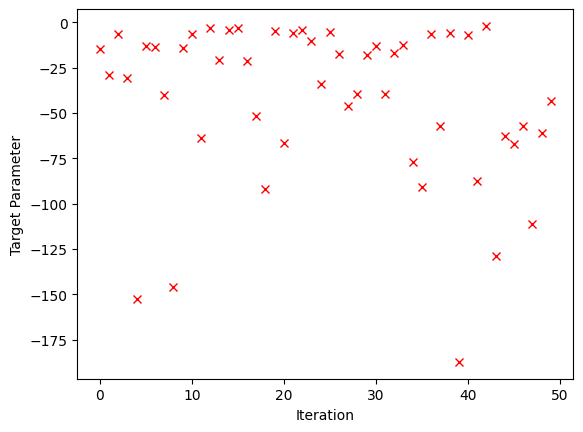

In [368]:
plt.plot(df["Iteracao"].values,"xr")
plt.ylabel("Target Parameter")
plt.xlabel("Iteration")